# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The data set consists of some basic information about each example such as their sex, education (which appears numerical but is actually categorical), marriage (things that probably will influence the result), as well as payment history which can display a trend of delayed payments that can definitely help predict the target. I can also see that there is the ID of the clients which I think is a feature that would probably be dropped, along with sex which for ethical reasons and bias, will also be dropped. I can also identify some ordinal data including, the payment history and education. Lastly, the target feature seems to be called "default.payment.next.month".

In [2]:
# reading the data as a dataframe
credit_df = pd.read_csv("./data/credit_card.csv")
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [3]:
# Splitting the data into 70% train and 30% test sizes
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=76)

# Splitting our target and feature columns
target = "default.payment.next.month"
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]

# Displaying the shapes to ensure nothing went wrong in creating the split
print("Shapes\n", "train:", train_df.shape, "| test: ", test_df.shape)

Shapes
 train: (21000, 25) | test:  (9000, 25)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [4]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# Summary Statistics
summary_statistics = train_df.describe()


# We choose AGE, LIMIT_BAL, MARRIAGE, EDUCATION, which all might affect the person's likeliness to default

# We will observe the mean and standard deviation for AGE and LIMIT_BAL to see their tendencies
mean_limit_bal = summary_statistics.loc['mean', 'LIMIT_BAL']
std_limit_bal = summary_statistics.loc['std', 'LIMIT_BAL']

mean_age = summary_statistics.loc['mean', 'AGE']
std_age = summary_statistics.loc['std', 'AGE']

# We will also observe the counts of the different CATEGORIES of MARRIAGE and EDUCATION
marriage_counts = train_df['MARRIAGE'].value_counts()
education_counts = train_df['EDUCATION'].value_counts()

# Displaying our summary
print(f"Mean LIMIT_BAL: {mean_limit_bal}, Standard Deviation: {std_limit_bal}")
print(f"Mean AGE: {mean_age}, Standard Deviation: {std_age}\n")
print(f"MARRIAGE counts: {marriage_counts}\n")
print(f"EDUCATION counts: {education_counts}\n")

Mean LIMIT_BAL: 167563.50857142857, Standard Deviation: 129919.11250174849
Mean AGE: 35.41295238095238, Standard Deviation: 9.136302130379192

MARRIAGE counts: MARRIAGE
2    11225
1     9508
3      230
0       37
Name: count, dtype: int64

EDUCATION counts: EDUCATION
2    9789
1    7522
3    3365
5     197
4      80
6      37
0      10
Name: count, dtype: int64



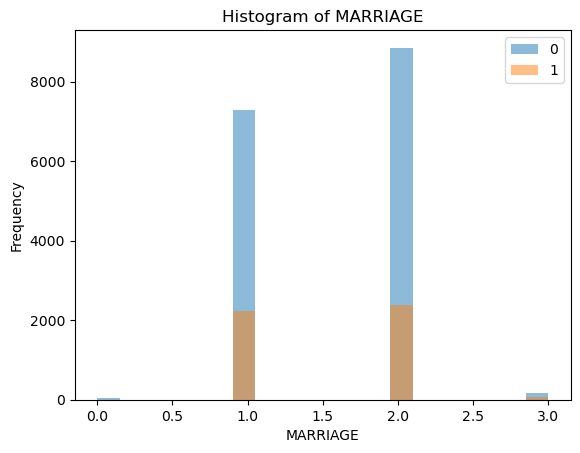

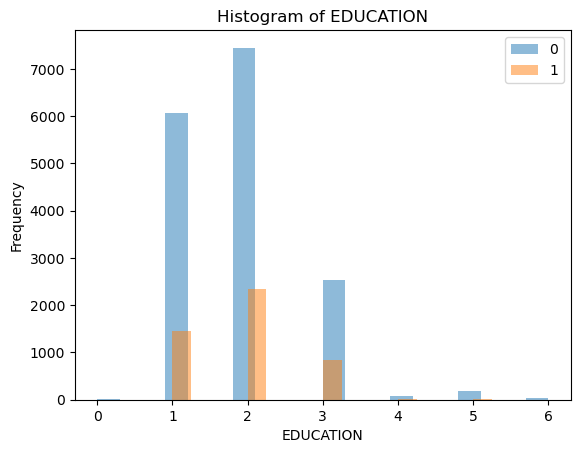

In [6]:
# Using HW3 and HW2 for inspiration for this code, we will create histograms for marriage and education
feats = ['MARRIAGE', 'EDUCATION']
for feat in feats:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=20, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

**Both married and single individuals have significant counts for defaults and non-defaults**
**. The same can be said for the education category.**

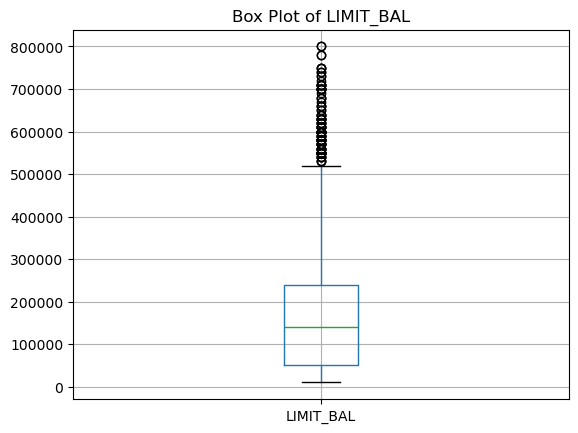

In [7]:
# For the numerical features, we will use a boxplot which is useful to visualize numerical statistics for outliers and see trends (source: class STAT251)
train_df[['LIMIT_BAL']].boxplot()
plt.title('Box Plot of LIMIT_BAL')
plt.show()

**We can see the majority of the customers have credit limit between ~50,000 to ~240,000 with some outliers in the very high limits**

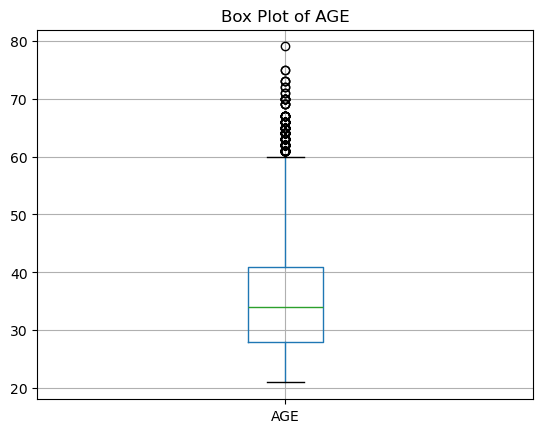

In [8]:
# Box plot for AGE
train_df[['AGE']].boxplot()
plt.title('Box Plot of AGE')
plt.show()

**We can see the majority of the customers are between the ages of around mid 20s to Early 40s**

In [9]:
# Getting number of defaults and number of non-defaults in our data to check for imbalance
num_defaults = y_train.value_counts()[0]
num_non_defaults = y_train.value_counts()[1]


# Summarizing
print("In our data we have:", num_non_defaults, "non-defaults and", num_defaults, "defaults")

In our data we have: 4659 non-defaults and 16341 defaults




**There does not appear to be any missing values (all counts match including the scientific notation)**

#### Observations
- As mentioned before there are some features we will probably drop:
    - ID
    - Sex
- We have **imbalance in the data** where there are **16341 default examples** , and **4659 non-default examples**, which we will need to deal with later
- otherwise the distribution looks ok with some outliers
- It seems that most of the data will be useful for classifying our target

#### Performance Metric
- We want to find as many actual defaults as we can, since that is what would cause losses to the credit card company
- Therefore we will try to prioritize **Recall**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

#### Feature types and transformations
- **Numerical Features**: LIMIT_BAL, AGE, BILL_AMT1 to BILL_AMT6, PAY_AMT1 to PAY_AMT6
    - Transformations: Scaling
- **Ordinal Features**: EDUCATION, PAY_0 to PAY_6
    - Transformations: Ordinal Encoding
- **Categorical/Nominal Features**: MARRIAGE
    - Transformations: One-Hot Encoding
- **Drop Features**: SEX, ID
<br><br>
We will need a column transformer as there are different transformations for different columns

In [10]:
# # Using HW3 as inspiration for this code

# Creating sets for our different types of features
numerical_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
ordinal_features = ['EDUCATION']
ordinal_features_oth = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_features = ['MARRIAGE']
drop_features = ['ID','SEX']


# Creating the transformers for the different types of features
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # Both ordinal features are already numerically ordered
ordinal_transformer_oth = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combing the transformers into a ColumnTransformer
preprocessor = make_column_transformer(
    (numeric_transformer, numerical_features),
    (ordinal_transformer, ordinal_features),
    (ordinal_transformer_oth, ordinal_features_oth),
    (categorical_transformer, categorical_features),
    ("drop", drop_features),
)

preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('ordinalencoder-1',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['EDUCATION']),
                                ('ordinalencoder-2',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['MARRIAGE']),
                                ('drop', 'drop', ['ID', 'SEX'])])

In [11]:
# Fitting and transforming the transformer on our training data
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))
transformed_test = pd.DataFrame(preprocessor.transform(X_test))
transformed_test.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.212164,-0.701937,1.234802,1.311500,3.011738,1.520267,0.994300,1.054119,0.030712,-0.022075,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0
1,-0.520055,-1.249217,-0.687854,-0.682998,-0.668210,-0.667072,-0.664277,-0.654041,-0.314136,-0.232176,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.481238,-0.701937,0.054357,0.050977,-0.013365,-0.535992,-0.607637,-0.613553,-0.215977,-0.178592,...,2.0,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
3,1.019401,2.581746,-0.659884,-0.654408,-0.638958,-0.635262,-0.622886,-0.611707,-0.344926,-0.251699,...,1.0,1.0,4.0,3.0,3.0,3.0,0.0,1.0,0.0,0.0
4,1.481238,0.939905,-0.691588,-0.687293,-0.672605,-0.671852,-0.661545,-0.651247,-0.334765,-0.244846,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [12]:
# Using hw3 code 

# Creating our dummy classifier using the stratified strategy to not let the high imbalance influence our baseline
dummy = DummyClassifier(strategy="stratified", random_state = 76)\

# We do not need to use the preprocessor as dummyClassifier does not look at features

# We will score using recall since that is the metric of interest
scores = cross_validate(dummy, X_train, y_train, return_train_score=True, scoring = "recall")
dummy_df = pd.DataFrame(scores)
dummy_df

,fit_time,score_time,test_score,train_score
0,0.002786,0.002940,0.224249,0.217870
1,0.001792,0.002564,0.232833,0.216260
2,0.001597,0.002454,0.206009,0.220016
3,0.001617,0.002642,0.224249,0.218406
4,0.001730,0.002401,0.226638,0.221567


The baseline model has a recall of ~0.22, which is very low compared to what its accuracy was, showing that accuracy in our case is definitely not the representative metric we are looking for and recall will be used for scoring in the next parts

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [13]:
# using HW4 Code for inspiration

# We will use logistic regression which is a classifier model

# Creating our model with class_weight='balanced' to deal with the imbalance
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

# param grid containing our C params for complexity
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Using gridsearch for hyperparameter optimization
grid_search = GridSearchCV(lr, param_grid, scoring ='recall', return_train_score=True)

# Fit the model with GridSearchCV
grid_search.fit(transformed_df, y_train)

# getting the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("best parameters: ", best_params)
print("best score: ", best_score)

best parameters:  {'C': 0.001}
best score:  0.6780452049805692


In [14]:
print("Mean cv score without hyperparameter optimization:", cross_val_score(lr, transformed_df, y_train, cv=5, scoring = 'recall').mean(), "\n\ncv_scores after hyperparameter optimization")
# 5 fold cross validation for the best model using recall for scoring
lr_cv_scores = pd.DataFrame(cross_validate(grid_search.best_estimator_, transformed_df, y_train, cv=5, scoring='recall', return_train_score = True))
lr_cv_scores


Mean cv score without hyperparameter optimization: 0.6183758753105941 

cv_scores after hyperparameter optimization


,fit_time,score_time,test_score,train_score
0,0.039768,0.004107,0.679185,0.677757
1,0.032515,0.004150,0.681330,0.683391
2,0.032835,0.004065,0.664163,0.682855
3,0.031998,0.004106,0.674893,0.678562
4,0.032482,0.004060,0.690655,0.678916


**When using Logisitic Regression there is a definite improvement over the baseline model (in both with and without hyperparameter optimization), where now we have a recall of around 0.66-0.69 and is a very large improvement, however with the lower scores being < 0.75 and low performance gap, it appears that the model is probably slightly underfitting (common for linear models)**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

**We will use Decision tree, SVM RBF, and RandomForest**

In [15]:
# importing the models that are not already imported
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [16]:
### DECISION TREE MODEL ###

# Creating the model with balanced hyperparameter to deal with imbalance and no max_depth
dt = DecisionTreeClassifier(class_weight='balanced', random_state = 42)

# running 5 fold cross validation on our data
cv_scores = pd.DataFrame(cross_validate(dt, transformed_df, y_train, cv=5, scoring='recall', return_train_score = True))
cv_scores

,fit_time,score_time,test_score,train_score
0,0.283621,0.003529,0.398069,1.0
1,0.292121,0.004019,0.403433,1.0
2,0.273947,0.003576,0.400215,1.0
3,0.291989,0.003942,0.394850,1.0
4,0.284502,0.003849,0.413534,1.0


**When using a Decision tree, it seems that the score drops significantly compared to a linear model and, probably because the model has no max_depth, is severely overfitting on the training data. The model also has a slower fit time than our linear model.**

In [17]:
### SVM RBF MODEL ###

# Creating the model with balanced hyperparameter to deal with imbalance and default complexity
svc = SVC(class_weight='balanced', random_state = 42)

# Fitting the model on our preprocessed training df
svc.fit(transformed_df, y_train)


# running 5 fold cross validation on our data
cv_scores = pd.DataFrame(cross_validate(svc, transformed_df, y_train, cv=5, scoring='recall', return_train_score = True))
cv_scores

,fit_time,score_time,test_score,train_score
0,8.351031,1.762010,0.564378,0.590555
1,8.016124,1.787963,0.581545,0.579823
2,8.140738,1.785314,0.557940,0.583848
3,8.084395,1.787558,0.559013,0.586262
4,8.140582,1.758954,0.582170,0.577253


**When using an SVM model, we get better scores than the decision tree, however it is still worse than our linear model, and also takes a really long time to fit, and score, due to the high number of features, which increases the dimensionality for the model. In this case the SVM model would not be the best even if it performed similar to the linear model due to how long it takes because of the dimensionality**

<!-- END QUESTION -->

<br><br>

In [18]:
### RANDOM FOREST CLASSIFIER ###

# Creating the model with balanced hyperparameter to deal with imbalance and default complexity
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Fitting the model on our preprocessed training df
rf.fit(transformed_df, y_train)

# running 5 fold cross validation on our data
cv_scores = pd.DataFrame(cross_validate(rf, transformed_df, y_train, cv=5, scoring='recall', return_train_score = True))
cv_scores

,fit_time,score_time,test_score,train_score
0,4.216181,0.052088,0.353004,0.999732
1,4.140672,0.052984,0.368026,0.999732
2,3.949724,0.051042,0.349785,0.999463
3,3.922997,0.051147,0.333691,1.000000
4,3.955081,0.052212,0.351235,0.999464


**When using the Random Forest model with default complexity, it seems that the test score is still worse than all of our models, with a relatively high fit time. However I think this would be improved drastically after hyperparameter optimization due to the nature of how the model works.**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [19]:
### Decision Tree optimization using max_depth ###

# Creating the parameter grid for our max_depth hyperparameter
param_grid_dt = {'max_depth': np.arange(1,11)}

# Creating the Grid search to optimize the max_depth parameter
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

# Fitting it onto our data
grid_search_dt.fit(transformed_df, y_train)


dt_cv_results = pd.DataFrame(cross_validate(grid_search_dt.best_estimator_, transformed_df, y_train, cv=5, scoring='recall', return_train_score=True))
print("best params:", grid_search_dt.best_params_)
dt_cv_results

best params: {'max_depth': 6}


,fit_time,score_time,test_score,train_score
0,0.116101,0.003468,0.627682,0.683391
1,0.115628,0.003454,0.601931,0.635364
2,0.115236,0.003414,0.657725,0.697344
3,0.115450,0.003443,0.599785,0.621143
4,0.115640,0.003407,0.578947,0.618562


**After Hyperparameter optimization, resulting in a max_depth of 6, our decision tree results are much better and the scores doubled, and now we have a much more accurate model that is not overfitting, however there is still better models to use for our case**

In [20]:
### SVM optimization using max_depth ###

# Creating the parameter grid for our C hyperparameter (it will take too long to do more than a few values)
param_grid_svc = {'C': [0.1, 1, 10]}

# Creating the Grid search to optimize the max_depth parameter
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

# Fitting it onto our data
grid_search_svc.fit(transformed_df, y_train)


svc_cv_results = pd.DataFrame(cross_validate(grid_search_svc.best_estimator_, transformed_df, y_train, cv=5, scoring='recall', return_train_score=True))
print("best params:", grid_search_svc.best_params_)
svc_cv_results

best params: {'C': 1}


,fit_time,score_time,test_score,train_score
0,8.104606,1.782242,0.564378,0.590555
1,7.941714,1.743514,0.581545,0.579823
2,8.128011,1.740062,0.557940,0.583848
3,8.173342,1.740643,0.559013,0.586262
4,7.992141,1.744944,0.582170,0.577253


**Even after Hyperparameter Optimization, the SVM model remains as bad as it was before (bad scores, really long time to finish running), proving that this model in general is not good for this specific problem and should not be used in our case**

<!-- END QUESTION -->

<br><br>

In [21]:
### Random Forest optimization using max_depth, n_estimators, with default max_features for perfomance purposes###

# Creating the parameter grid for our n_estimatores and max_depth hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': np.arange(1,11),
}
# Creating the Grid search to optimize the max_depth parameter
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall', return_train_score=True, n_jobs=-1)

# Fitting it onto our data
grid_search_rf.fit(transformed_df, y_train)


rf_cv_results = pd.DataFrame(cross_validate(grid_search_rf.best_estimator_, transformed_df, y_train, cv=5, scoring='recall', return_train_score=True))
print("best params:", grid_search_rf.best_params_)
rf_cv_results

best params: {'max_depth': 5, 'n_estimators': 100}


,fit_time,score_time,test_score,train_score
0,1.470605,0.015605,0.584764,0.616582
1,1.472556,0.015389,0.601931,0.609874
2,1.462635,0.016025,0.592275,0.610679
3,1.430955,0.014889,0.579399,0.597800
4,1.429799,0.014848,0.601504,0.602468


**Surprisingly, the random forest model is still worse than our linear model, and takes longer to fit with worse scores, and is underfitting**

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

In [22]:
# Best model was logistic regression model with C = 0.001
best_model = LogisticRegression(solver='liblinear', class_weight='balanced', C = 0.001)

# Fitting the model
best_model.fit(transformed_df, y_train)

# predicting
y_pred_test = best_model.predict(transformed_test)

# calculating our scores and creating a confusion matrix
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Dsiplaying the results
print("Test Set Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

Test Set Results:
Accuracy: 0.646
Precision: 0.344
Recall: 0.675
F1 Score: 0.456
Confusion Matrix:
[[4482 2541]
 [ 642 1335]]


2. The recall test score agrees with the validation scores being around 0.67. This means the model generalizes well and is trustworthy, however there could be room for improvement since the scores are alarmingly low even when trying to maximize recall. There also is no significant optimization bias as the scores are consistent.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [23]:
mean_fit_time = lr_cv_scores['fit_time'].mean()
mean_score_time = lr_cv_scores['score_time'].mean()
mean_test_score = lr_cv_scores['test_score'].mean()

results_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Validation Score': [0.680, 0.350, mean_test_score, 0.455], 
    'Test Score': [0.646, 0.344, 0.675, 0.456]
})

# Display
print(conf_matrix)
results_summary.head(10)

[[4482 2541]
 [ 642 1335]]


,Metric,Validation Score,Test Score
0,Accuracy,0.680000,0.646
1,Precision,0.350000,0.344
2,Recall,0.678045,0.675
3,F1 Score,0.455000,0.456


### Conclusion
- The model has a decently high recall value of 0.675 which should identify and predict most defaults
- The model is also consistent as the test score was very close to the validation score, meaning the model will generalize well
- However it also has a high number of false positives, which can be tuned by trying out different models than the ones above
- It also might have helped to optimize the hyperparameters further, but was not possible due to time and hardware limitations
- Ensemble methods could have also been used

#### Final Recall Score : 0.675

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!